In [1]:
# Parameters

slabLength = 1 # The length of the interface that light is allowed to
               # shine on in SI units
distH = 1 # The horizontal distance between the light source and the
          # photomultiplier in SI units
distS = 1 # The distance between the interface and the light source in
          # SI units
distP = 1 # The distance between the interface and the photomultiplier in
          # SI units
refIndex1 = 1 # The refractive index of medium 1
refIndex2 = 1.33 # The refractive index of medium 2
numPiece = 100000 # The number of pieces that the length of the interface
                  # that light is allowed to shine on is divided into
pieceLen = slabLength/numPiece # The length of each "piece" of the interface
                               # in SI units
speed = 3*(10**8) # The speed of light in SI units
start = 0 # The position of the leftmost end of the length of the interface
          # that light is allowed to shine on in SI units

In [2]:
# The function that calculates the times for various paths that a photon
# may take to travel from the light source to the photomultiplier

def createTimes(numPiece, pieceLen, distH, distS, distP, start, speed):
    timesList = []
    for i in range(numPiece+1):
        time = (math.sqrt((start+i*pieceLen)**2+distS**2)/(speed/refIndex1))
        +(math.sqrt((start+i*pieceLen-distP)**2+distP**2)/(speed/refIndex2))
        timesList.append(time)
    return timesList

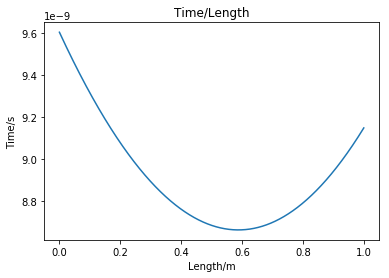

In [5]:
# Code that creates a plot

import math
import pylab
timesList = createTimes(numPiece, pieceLen, distH, distS, distP, start, speed)
length = []
for i in range(numPiece+1):
    length.append(i*pieceLen)
pylab.figure("Time/Length")
pylab.title("Time/Length")
pylab.plot(length, timesList)
pylab.xlabel("Length/m")
pylab.ylabel("Time/s")
pylab.show()

In [4]:
# Code that finds the minimum time, calculates the corresponding angles
# of incidence and refraction, and verifies Snell's law

minTime = None
for i in range(numPiece):
    if minTime==None or timesList[i]<minTime:
        minTime = timesList[i]
        index = i
if index==0 or index==numPiece-1:
    print("Minimum time was not found.")
else:
    angleI = math.pi/2-math.asin(distS/math.sqrt((distS**2)
                                                 +(start+index*pieceLen)**2))
    angleR = math.pi/2-math.asin(distP/math.sqrt(
        (distP**2)+(start+index*pieceLen-distH)**2))
    print("refractive_index_1 x sin(angle_of_incidence) =", round(
        refIndex1*math.sin(angleI), 3))
    print("")
    print("refractive_index_2 x sin(angle_of_refraction) =", round(
        refIndex2*math.sin(angleR), 3))

refractive_index_1 x sin(angle_of_incidence) = 0.507

refractive_index_2 x sin(angle_of_refraction) = 0.507
